In [1]:
# import the necessary modules here
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics

In [2]:
data = pd.read_csv('data.csv', delimiter=",", header=None).values
print(data.shape)

(50, 2)


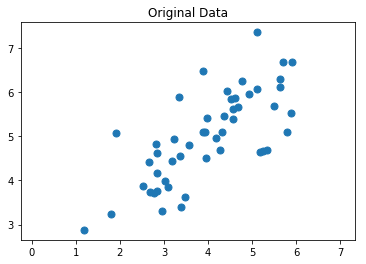

In [6]:
# visualize data
plt.plot(data[:,0],data[:,1], '.', markersize=14)
plt.axis('equal');
plt.title('Original Data')
plt.show()

### Step 1: Normalising the data

In [7]:
mu = data.mean(axis=0) # mean of each col
sigma = data.std(axis=0)  # std dev of each col

Xnorm = (data - mu)/sigma
print (Xnorm[0:5,:])

[[-0.52327626 -1.59279926]
 [ 0.46383434  0.84036357]
 [-1.14836881 -0.58315168]
 [-1.05407533 -1.27072671]
 [-0.98397954 -0.81658765]]


### Step 2: Calculate the covariance matrix of normalised data

In [8]:
# Covariance matrix of normalized data
m = len(Xnorm)
covmat = np.dot(Xnorm.T, Xnorm)/m 
print(covmat)

[[1.        0.7355261]
 [0.7355261 1.       ]]


### Step 3: Calculate the eigenvectors and eigenvalues of the covariance matrix

In [9]:
S,U = np.linalg.eig(covmat)

print('Eigen values: {}'.format(S))
print('Eigen vectors:')
print(U)

Eigen values: [1.7355261 0.2644739]
Eigen vectors:
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


#### Decorrelation

In [10]:
# Z contains uncorrelated data  
Z = np.dot(Xnorm,U)

#### visualize the data before and after PCA.

Text(0.5, 1.0, 'Data after PCA')

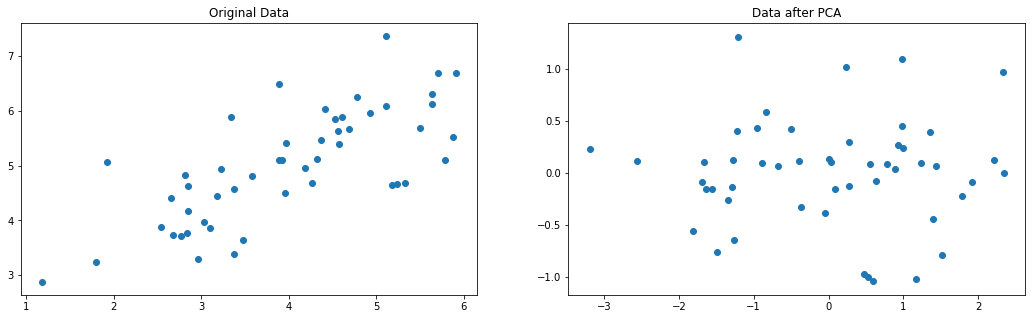

In [11]:
# 2 plots in one row
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18,5))  # added size of each figs (width, height)
fig.subplots_adjust(wspace=0.2) # leave some space between figs


# plot for original data 
axs[0].scatter(data[:,0], data[:,1])
axs[0].set_title("Original Data")


# plot for uncorrelated data after PCA
axs[1].scatter(Z[:,0], Z[:,1])
axs[1].set_title("Data after PCA")

#### Dimensionality Reduction

In [12]:
k = 1 # number of principal components to retain

Ured =  U[:,0:k] # choose the first k principal components

#project our data Xnorm onto Ured
Zred = np.dot(Xnorm,Ured) 

print(Zred.shape)
print(Ured.shape)

(50, 1)
(2, 1)


(50, 2)


Text(0.5, 1.0, 'Recovered data after dimensionality reduction')

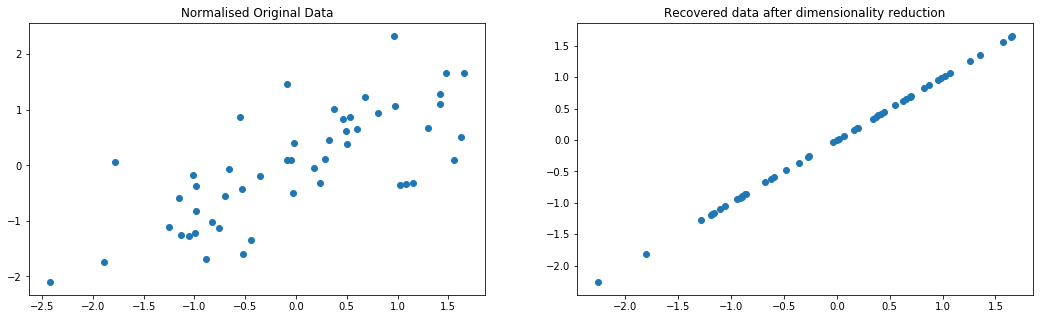

In [13]:
#recover our Xnorm data from Zred
Xrec = np.dot(Zred, Ured.T)
print(Xrec.shape)


#Visualize the recovered data
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18,5))  # added size of each figs (width, height)
fig.subplots_adjust(wspace=0.2) # leave some space between figs


# plot for Xnorm 
axs[0].scatter(Xnorm[:,0], Xnorm[:,1])
axs[0].set_title("Normalised Original Data")


# plot for Xrec
axs[1].scatter(Xrec[:,0], Xrec[:,1])
axs[1].set_title("Recovered data after dimensionality reduction")

#### Measuring ‘reconstruction error’

In [14]:
rec_err = np.linalg.norm(Xnorm-Xrec, 'fro')/np.linalg.norm(Xnorm, 'fro')
print("The reconstruction error is: {}".format(rec_err))

The reconstruction error is: 0.3636439898404388
